In [1]:
from google.colab import files
uploaded = files.upload()


Saving predictive_maintenance.csv to predictive_maintenance.csv


In [2]:
# Importing essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To display graphs inside the notebook
%matplotlib inline


In [3]:
# Reading the uploaded CSV into a DataFrame
df = pd.read_csv('predictive_maintenance.csv')

# Showing the first 5 rows
df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


Type	Type of machine (L, M, or H → Light, Medium, Heavy duty)
1.Air temperature [K]	Temperature of the surrounding air (in Kelvin)
2.Process temperature [K]	Temperature inside the machine process (in Kelvin)
3.Rotational speed [rpm]	How fast the machine is spinning (Revolutions Per Minute)
4.Torque [Nm]	Amount of twisting force applied (in Newton meters)
5.Tool wear [min]	Time in minutes the machine tool has been used
6.TWF, HDF, PWF, OSF, RNF	Failure flags — these are 1 or 0 (True/False) indicating specific failure types
7.Machine failure	🔴 Target column → 1 = Machine failed, 0 = No failure

ColumnName	 Full Form	What It Represents
1.TWF	    Tool Wear Failure	 #Failure due to excessive wear on the machine’s tool
2.HDF    	Heat Dissipation Failure	#Failure due to poor heat management or overheating
3.PWF   	Power Failure	  #Electrical failure or inconsistent power supply
4.OSF 	Overstrain Failure	#Machine broke down due to too much strain or pressure
5.RNF 	Random Failures 	#Unpredictable/other failures that don’t fit the above categories

In [4]:
#EDA Step
# Check number of rows and columns
print("Shape of dataset:", df.shape)

# See column names and data types
df.info()


Shape of dataset: (10000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [5]:
# Check if there are any missing (null) values in the dataset
df.isnull().sum()


,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


In [6]:
df.columns


Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [7]:
#Check Target Value Distribution
# check how many machines actually failed.
# Count how many rows have machine failure vs no failure
# Check how many machines failed vs didn't fail
df['Target'].value_counts()




,count
Target,
0,9661
1,339


In [8]:
#summary Stats & Unique Values
df.describe()


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [9]:
# Loop through each column and print unique values
#Check Unique Values in Each Column
for column in df.columns:
    print(f"{column}: {df[column].unique()}")
    print()


UDI: [    1     2     3 ...  9998  9999 10000]

Product ID: ['M14860' 'L47181' 'L47182' ... 'M24857' 'H39412' 'M24859']

Type: ['M' 'L' 'H']

Air temperature [K]: [298.1 298.2 298.3 298.5 298.4 298.6 298.7 298.8 298.9 299.  299.1 298.
 297.9 297.8 297.7 297.6 297.5 297.4 297.3 297.2 297.1 297.  296.9 296.8
 296.7 296.6 296.5 296.3 296.4 296.2 296.1 296.  295.9 295.8 295.7 295.6
 295.5 295.4 295.3 299.2 299.3 299.5 299.4 299.6 299.7 299.8 299.9 300.
 300.1 300.2 300.3 300.4 300.5 300.6 300.7 300.8 300.9 301.  301.1 301.2
 301.3 301.4 301.5 301.6 301.7 301.8 301.9 302.  302.1 302.2 302.3 302.4
 302.5 302.6 302.7 302.8 302.9 303.  303.1 303.2 303.3 303.4 303.5 303.6
 303.7 303.8 303.9 304.  304.1 304.2 304.3 304.4 304.5]

Process temperature [K]: [308.6 308.7 308.5 309.  308.9 309.1 309.2 309.3 309.4 309.5 308.8 308.4
 308.3 308.2 308.1 308.  307.9 309.6 309.7 309.8 309.9 310.  310.1 310.2
 307.8 307.7 307.6 307.5 307.4 307.3 307.2 307.1 307.  306.9 306.8 306.7
 306.6 306.5 306.4 306.3 30

/tmp/ipython-input-10-835366500.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Type', palette='Set2')


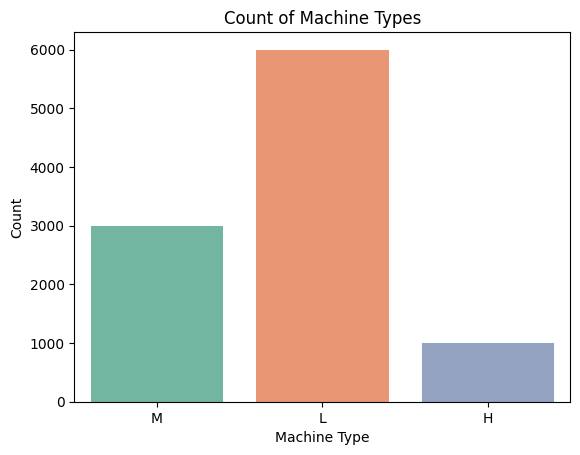

In [10]:
#How many machines of each type (L, M, H) are in the dataset.
#1. Countplot of Machine Types (Type)
# Count of each machine type
sns.countplot(data=df, x='Type', palette='Set2')
plt.title("Count of Machine Types")
plt.xlabel("Machine Type")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-11-2484860402.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Target', palette='Set1')


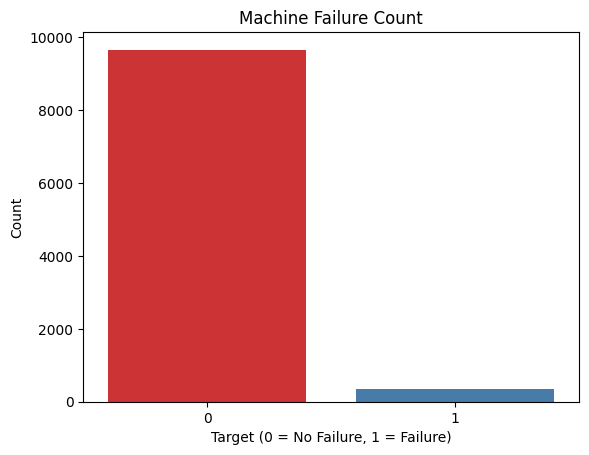

In [11]:
#Countplot of Failures vs Non-Failures (Target)
#How many machines failed vs didn’t fail.
# Count of target classes (failures)
sns.countplot(data=df, x='Target', palette='Set1')
plt.title("Machine Failure Count")
plt.xlabel("Target (0 = No Failure, 1 = Failure)")
plt.ylabel("Count")
plt.show()


#Type countplot	Helps us see if one type is used more than others
#Target countplot	Helps check class imbalance visually


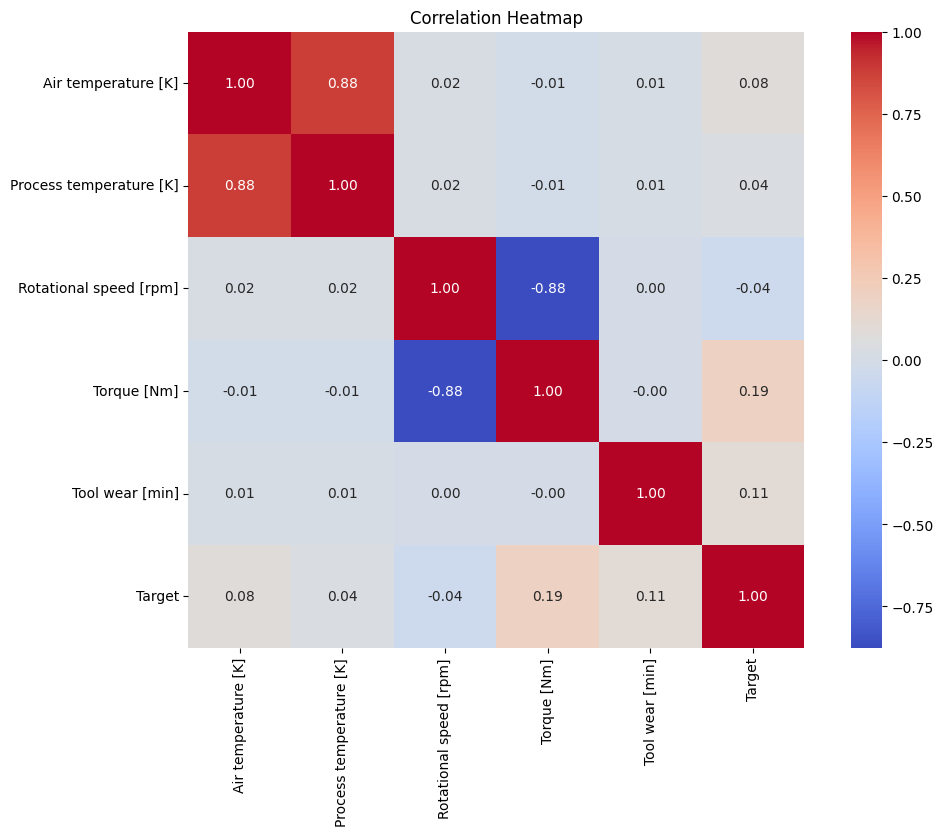

In [12]:
# Create a new DataFrame with only relevant numeric columns
numeric_df = df.drop(['UDI', 'Product ID', 'Failure Type', 'Type'], axis=1)

# Now compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()



##
#what the Heatmap Explains:
The correlation heatmap shows how strongly each numeric column is related to other numeric columns.

It gives values between -1 and 1

+1 → strong positive correlation (they increase together)

-1 → strong negative correlation (one increases, the other decreases)

0 → no correlation (they’re unrelated)



/tmp/ipython-input-13-2476503152.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Failure Type', palette='Set3')


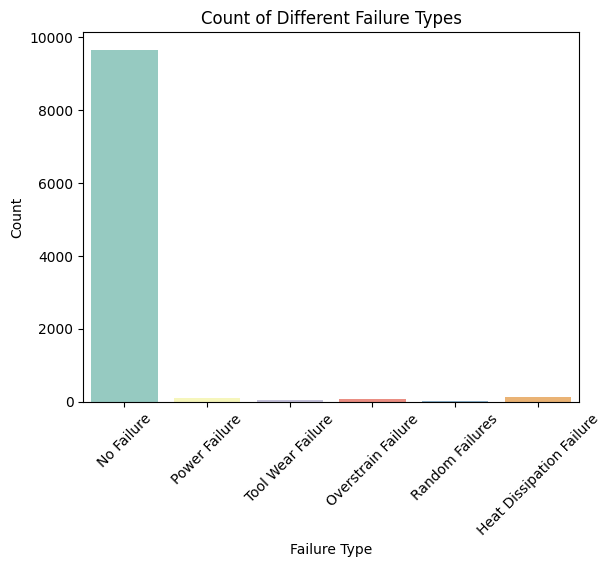

In [13]:
#Final EDA Visuals — Failure Type and Feature Trends
# Countplot for each failure type
sns.countplot(data=df, x='Failure Type', palette='Set3')
plt.title("Count of Different Failure Types")
plt.xticks(rotation=45)
plt.xlabel("Failure Type")
plt.ylabel("Count")
plt.show()


##Why This Is Useful:
You can see which failure types are most common (e.g., Tool Wear vs Power Failure)

Tells you what kind of issues are happening most in the machines

Even though Failure Type won’t be used as a label, it gives context to the Target



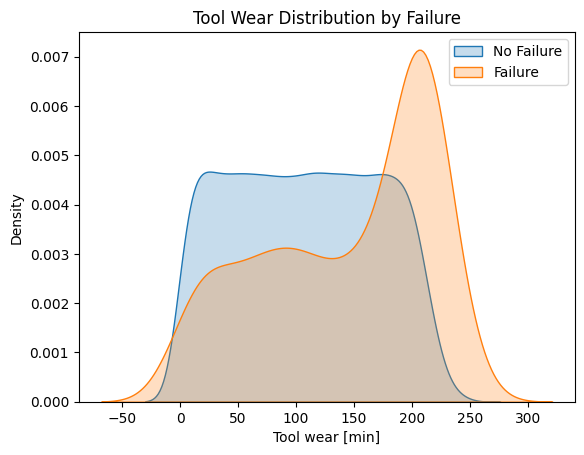

In [14]:
# KDE Plot (Distribution) of Tool Wear by Failure
# Distribution of Tool Wear for failed vs non-failed machines
sns.kdeplot(data=df[df['Target'] == 0]['Tool wear [min]'], label='No Failure', fill=True)
sns.kdeplot(data=df[df['Target'] == 1]['Tool wear [min]'], label='Failure', fill=True)
plt.title("Tool Wear Distribution by Failure")
plt.xlabel("Tool wear [min]")
plt.legend()
plt.show()


🔺 If the Failure (1) curve is shifted to the right (higher tool wear values)	It means machines with more tool wear are more likely to fail
🔻 If the No Failure (0) curve is more concentrated at lower tool wear	It means machines with less tool usage are generally safe
🟰 If the curves are very similar or overlap	Tool wear may not be a strong predictor of failure

In [15]:
##Data Preprocessing (Cleaning + Encoding)
#Drop Unneeded Columns
# Dropping columns that don't help in prediction
df = df.drop(['UDI', 'Product ID', 'Failure Type'], axis=1)


In [16]:
##Encode the 'Type' Column
#Type contains values like 'L', 'M', 'H', which must be converted to numbers.
# Label Encoding for 'Type'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])


In [17]:
##Split the Data into Training and Testing Sets
#Define X (features) and y (target)
# Features (independent variables)
X = df.drop('Target', axis=1)

# Target (dependent variable)
y = df['Target']


In [18]:
#Perform Train-Test Split
from sklearn.model_selection import train_test_split

# Splitting the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
#Model Training (Logistic Regression)
#Train the Model
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [20]:
#Make Predictions
# Predict on the test data
y_pred = model.predict(X_test)


In [21]:
#Model Evaluation
#Accuracy & Classification Report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9725

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1939
           1       0.62      0.26      0.37        61

    accuracy                           0.97      2000
   macro avg       0.80      0.63      0.68      2000
weighted avg       0.97      0.97      0.97      2000



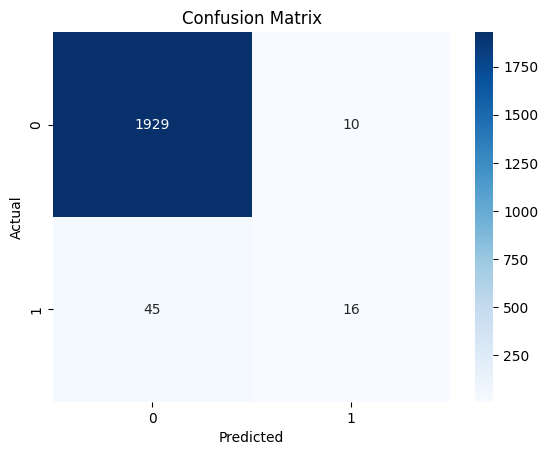

In [22]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize it
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


 Cell	             Meaning
#Top-left (0,0)	  Correctly predicted no failure
#Bottom-right (1,1)	Correctly predicted failures
#Top-right (0,1)	Predicted failure but there was no failure (false positive)
#Bottom-left (1,0)	Missed a real failure (false negative)





In [23]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'machine_failure_model.pkl')


['machine_failure_model.pkl']

In [24]:
# Load the saved model (just to test)
loaded_model = joblib.load('machine_failure_model.pkl')

# Try predicting with the loaded model
loaded_model.predict(X_test[:5])


array([0, 0, 0, 0, 0])


#So the output means:

The model predicted "0" (No Failure) for the first 5 rows in your test set.